# Import des librairies et de la base 

In [16]:
# Importation des bibliothèques nécessaires
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
R = input("On est en local ? (Y)")
R = R.upper()

if R == 'Y':
    Path = 'G:/Mon Drive/Colab Notebooks/Projet S3/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = '/content/drive/MyDrive/Colab Notebooks/Projet S3/'

In [5]:
Pathdata = Path + 'train.csv'
data = pd.read_csv(Pathdata)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data['YearBuilt'] = data['YearBuilt'].astype('object')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')
data['GarageYrBlt'] = data['GarageYrBlt'].astype('object')

# Ajustement de la base
data['Alley'] = data['Alley'].fillna('No alley')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('No Garage')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('No feature')
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['MasVnrType'] = data['MasVnrType'].fillna('No veneer')

# drop les lignes avec des valeurs manquantes
data = data.dropna()

# Affiche la taille de la base
print(data.shape)

data.dtypes

(1460, 81)
(1451, 81)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
Pathdata2 = Path + 'test.csv'
data2 = pd.read_csv(Pathdata2)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data2['YearBuilt'] = data2['YearBuilt'].astype('object')
data2['YearRemodAdd'] = data2['YearRemodAdd'].astype('object')
data2['MoSold'] = data2['MoSold'].astype('object')
data2['YrSold'] = data2['YrSold'].astype('object')
data2['GarageYrBlt'] = data2['GarageYrBlt'].astype('object')

# Ajustement de la base
data2['Alley'] = data2['Alley'].fillna('No alley')
data2['BsmtQual'] = data2['BsmtQual'].fillna('No Basement')
data2['BsmtCond'] = data2['BsmtCond'].fillna('No Basement')
data2['BsmtExposure'] = data2['BsmtExposure'].fillna('No Basement')
data2['BsmtFinType1'] = data2['BsmtFinType1'].fillna('No Basement')
data2['BsmtFinType2'] = data2['BsmtFinType2'].fillna('No Basement')
data2['FireplaceQu'] = data2['FireplaceQu'].fillna('No Fireplace')
data2['GarageType'] = data2['GarageType'].fillna('No Garage')
data2['GarageFinish'] = data2['GarageFinish'].fillna('No Garage')
data2['GarageQual'] = data2['GarageQual'].fillna('No Garage')
data2['GarageCond'] = data2['GarageCond'].fillna('No Garage')
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna('No Garage')
data2['PoolQC'] = data2['PoolQC'].fillna('No Pool')
data2['Fence'] = data2['Fence'].fillna('No Fence')
data2['MiscFeature'] = data2['MiscFeature'].fillna('No feature')
data2['LotFrontage'] = data2['LotFrontage'].fillna(0)
data2['MasVnrType'] = data2['MasVnrType'].fillna('No veneer')

print(data2.shape)

(1459, 80)


In [14]:
# Convertir toutes les données catégorielles en chaînes de caractères
data_categorical = data.select_dtypes(include=['object']).astype(str)

# Traitement des variables catégorielles avec le codage one-hot
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_categorical = onehot_encoder.fit_transform(data_categorical)

# Création d'un nouveau DataFrame avec les variables catégorielles encodées
X_categorical_df = pd.DataFrame(X_categorical, columns=onehot_encoder.get_feature_names_out())

# Suppression des colonnes catégorielles originales et ajout des colonnes encodées
data_numeric = data.select_dtypes(exclude=['object']).join(X_categorical_df)

# Séparation des variables indépendantes et de la variable dépendante
X = data_numeric.drop('SalePrice', axis=1)
y = data['SalePrice']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror')

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RMSE: 24178.121064216168


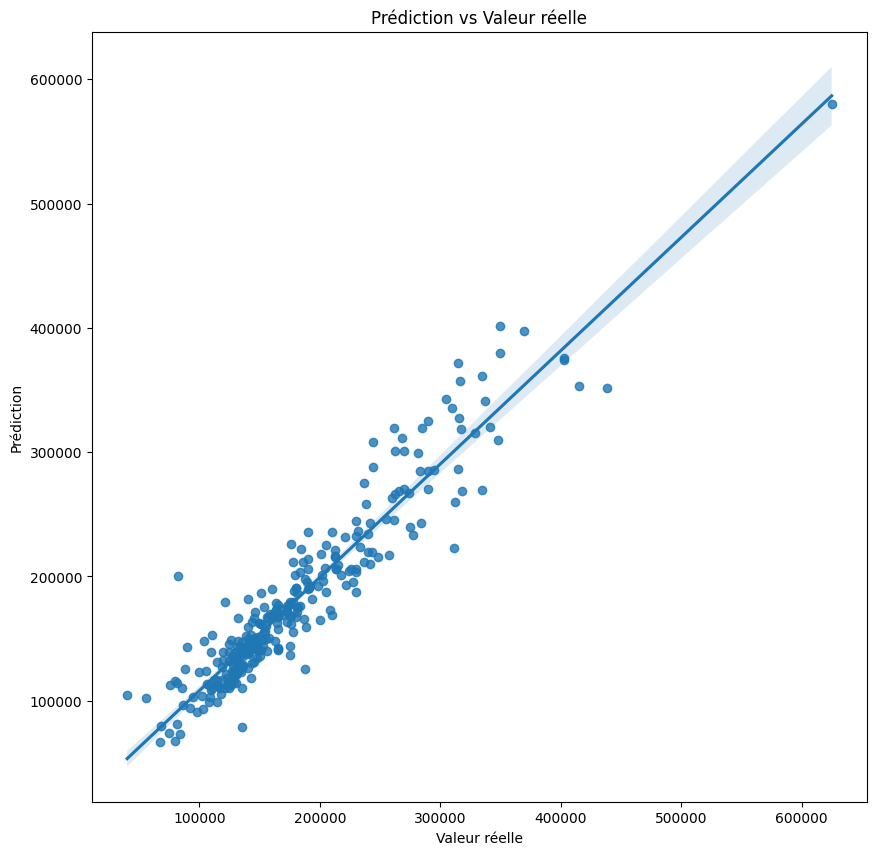

In [17]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

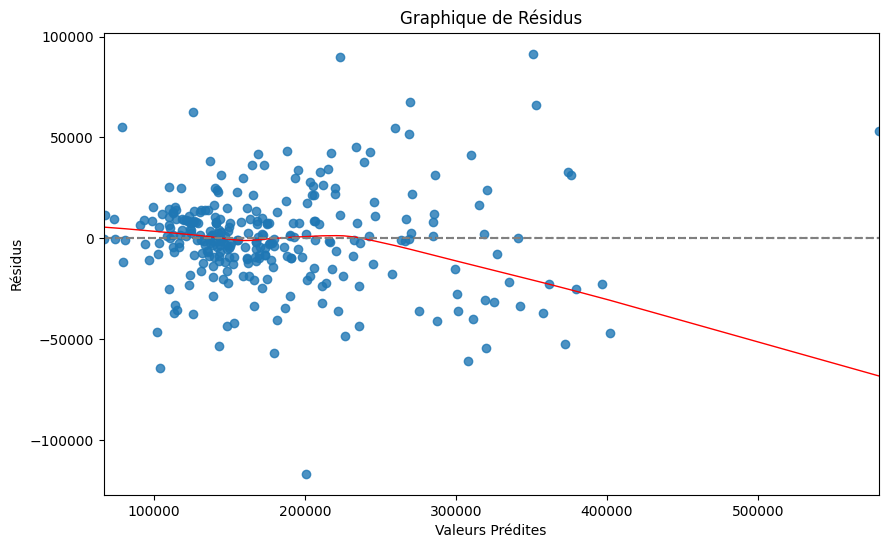

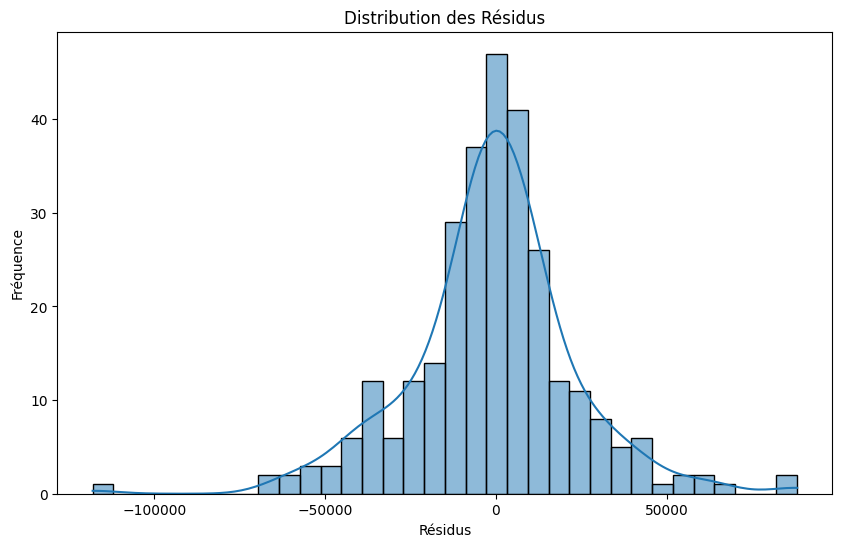

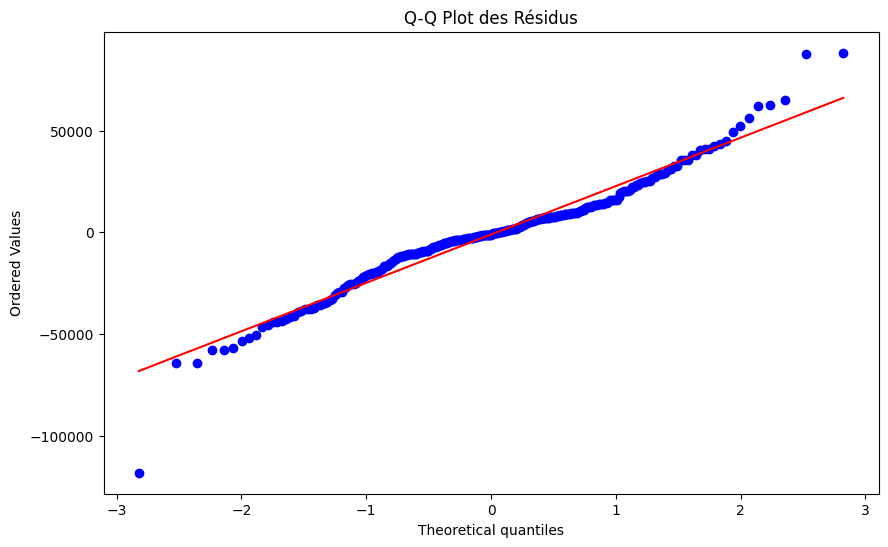

In [18]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [21]:
# Application du modèle ssur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Note: Utilisez le même objet 'onehot_encoder' que vous avez utilisé pour l'entraînement
X_categorical = onehot_encoder.transform(data2[categorical_features])

# Création d'un nouveau DataFrame avec les variables catégorielles encodées
X_categorical_df = pd.DataFrame(X_categorical, columns=onehot_encoder.get_feature_names_out())

# Combine the numerical features and the transformed categorical features
data2_transformed = pd.concat([data2[numeric_features], X_categorical_df], axis=1)

# Prédire sur l'ensemble de test transformé
y_pred = model.predict(data2_transformed)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred})

submission.to_csv(Path + 'submission XGBoost.csv', index=False)


## Meilleur parametre

In [22]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

# Définir les paramètres et leurs distributions
param_dist = {
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0.5, 1.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=25, cv=3, verbose=2, n_jobs=-1)

random_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Meilleurs paramètres: {'colsample_bytree': 0.7923984158587971, 'gamma': 0.5494350733734006, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.761728176289353}


In [23]:
# Création du modèle de régression XGBoost
model = xgb.XGBRegressor(**random_search.best_params_)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


RMSE: 27217.51751475357


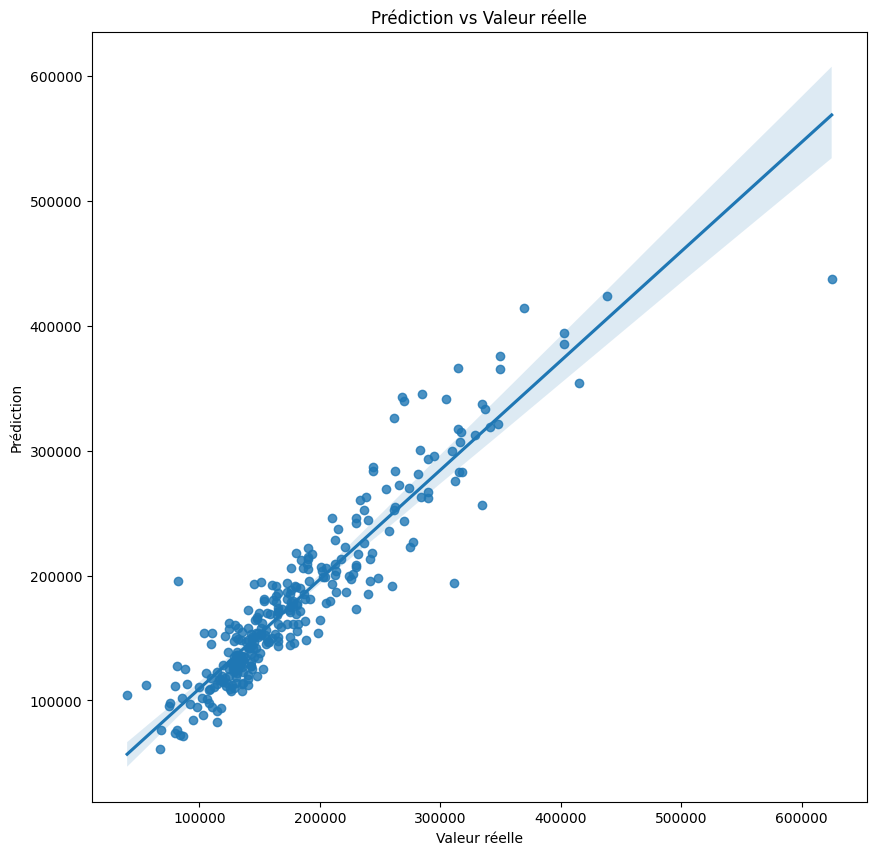

In [24]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

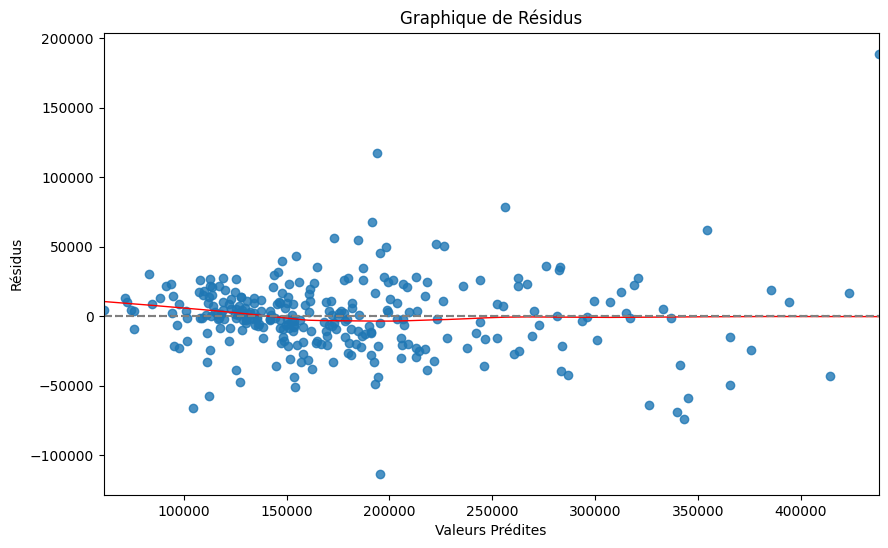

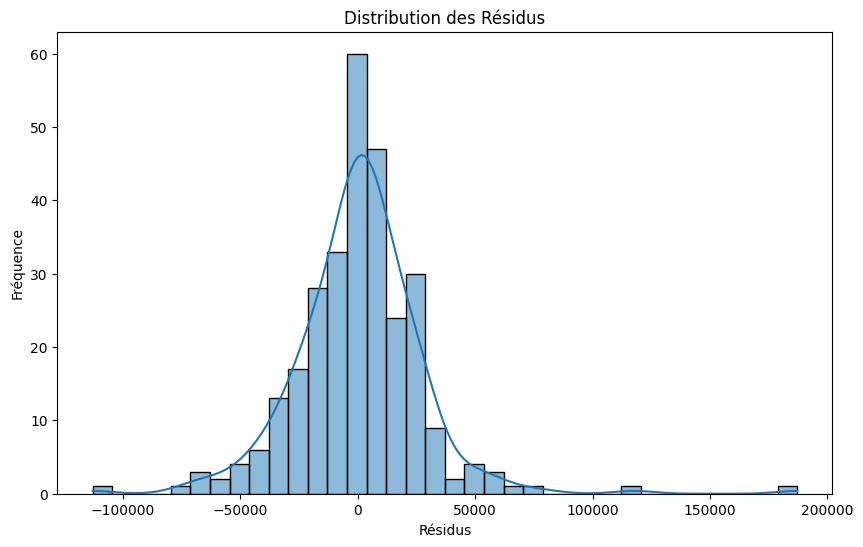

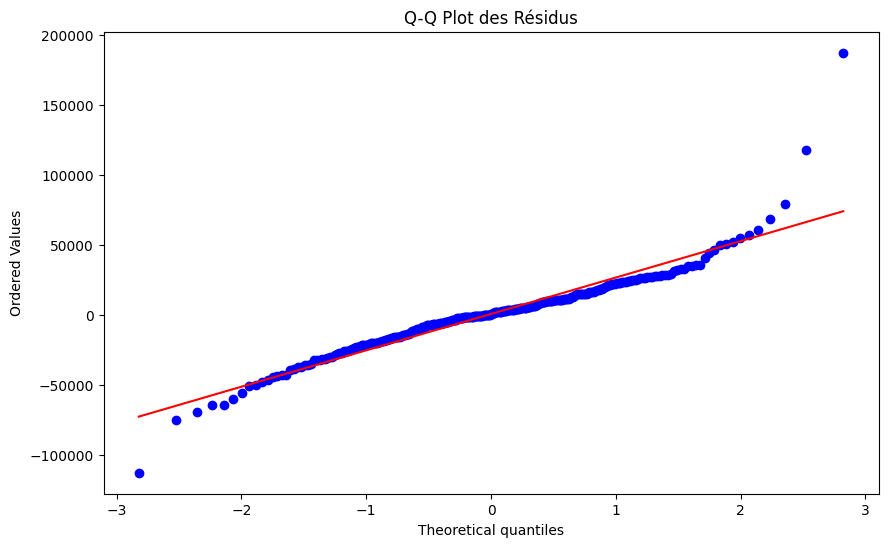

In [25]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [26]:
# Application du modèle ssur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Note: Utilisez le même objet 'onehot_encoder' que vous avez utilisé pour l'entraînement
X_categorical = onehot_encoder.transform(data2[categorical_features])

# Création d'un nouveau DataFrame avec les variables catégorielles encodées
X_categorical_df = pd.DataFrame(X_categorical, columns=onehot_encoder.get_feature_names_out())

# Combine the numerical features and the transformed categorical features
data2_transformed = pd.concat([data2[numeric_features], X_categorical_df], axis=1)

# Prédire sur l'ensemble de test transformé
y_pred = model.predict(data2_transformed)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred})

submission.to_csv(Path + 'submission XGBoost Param.csv', index=False)
